In [73]:
# loading the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

In [74]:
path=r"F:\Health care project\datasets\indian_liver_patient.csv"
df=pd.read_csv(path)

In [75]:
df.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1


In [76]:
df.shape

(583, 11)

In [77]:
df.columns

Index(['Age', 'Gender', 'Total_Bilirubin', 'Direct_Bilirubin',
       'Alkaline_Phosphotase', 'Alamine_Aminotransferase',
       'Aspartate_Aminotransferase', 'Total_Protiens', 'Albumin',
       'Albumin_and_Globulin_Ratio', 'Dataset'],
      dtype='object')

In [78]:
df.describe()

,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
count,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,579.000000,583.000000
mean,44.746141,3.298799,1.486106,290.576329,80.713551,109.910806,6.483190,3.141852,0.947064,1.286449
std,16.189833,6.209522,2.808498,242.937989,182.620356,288.918529,1.085451,0.795519,0.319592,0.452490
min,4.000000,0.400000,0.100000,63.000000,10.000000,10.000000,2.700000,0.900000,0.300000,1.000000
25%,33.000000,0.800000,0.200000,175.500000,23.000000,25.000000,5.800000,2.600000,0.700000,1.000000
50%,45.000000,1.000000,0.300000,208.000000,35.000000,42.000000,6.600000,3.100000,0.930000,1.000000
75%,58.000000,2.600000,1.300000,298.000000,60.500000,87.000000,7.200000,3.800000,1.100000,2.000000
max,90.000000,75.000000,19.700000,2110.000000,2000.000000,4929.000000,9.600000,5.500000,2.800000,2.000000


In [79]:
def convertdataset(x):
    if x==2:
        return 0
    return 1
df['Dataset'] = df['Dataset'].map(convertdataset)

In [80]:
df.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1


In [146]:
df.iloc[1]

Age                            62.00
Gender                          0.00
Total_Bilirubin                10.90
Direct_Bilirubin                5.50
Alkaline_Phosphotase          699.00
Alamine_Aminotransferase       64.00
Aspartate_Aminotransferase    100.00
Total_Protiens                  7.50
Albumin                         3.20
Albumin_and_Globulin_Ratio      0.74
Dataset                         1.00
Name: 1, dtype: float64

In [81]:
df.Dataset.value_counts()

Dataset
1    416
0    167
Name: count, dtype: int64

In [82]:
df.describe(include=['object'])

,Gender
count,583
unique,2
top,Male
freq,441


In [83]:
df.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1


In [84]:
df[df['Gender'] == 'Male'][['Dataset','Gender']].head()

,Dataset,Gender
1,1,Male
2,1,Male
3,1,Male
4,1,Male
5,1,Male


In [85]:
df['Gender'].value_counts()

Gender
Male      441
Female    142
Name: count, dtype: int64

In [86]:
# Categorical Value Handling
def convertgender(x):
    if x== 'Male':
        return 0
    else:
        return 1
df['Gender'] = df['Gender'].map(convertgender)

In [87]:
df.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,1,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,0,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,0,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,0,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,0,3.9,2.0,195,27,59,7.3,2.4,0.40,1


In [88]:
df.corr()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
Age,1.000000,-0.056560,0.011763,0.007529,0.080425,-0.086883,-0.019910,-0.187461,-0.265924,-0.216408,0.137351
Gender,-0.056560,1.000000,-0.089291,-0.100436,0.027496,-0.082332,-0.080336,0.089121,0.093799,0.003424,-0.082416
Total_Bilirubin,0.011763,-0.089291,1.000000,0.874618,0.206669,0.214065,0.237831,-0.008099,-0.222250,-0.206267,0.220208
Direct_Bilirubin,0.007529,-0.100436,0.874618,1.000000,0.234939,0.233894,0.257544,-0.000139,-0.228531,-0.200125,0.246046
Alkaline_Phosphotase,0.080425,0.027496,0.206669,0.234939,1.000000,0.125680,0.167196,-0.028514,-0.165453,-0.234166,0.184866
Alamine_Aminotransferase,-0.086883,-0.082332,0.214065,0.233894,0.125680,1.000000,0.791966,-0.042518,-0.029742,-0.002375,0.163416
Aspartate_Aminotransferase,-0.019910,-0.080336,0.237831,0.257544,0.167196,0.791966,1.000000,-0.025645,-0.085290,-0.070040,0.151934
Total_Protiens,-0.187461,0.089121,-0.008099,-0.000139,-0.028514,-0.042518,-0.025645,1.000000,0.784053,0.234887,-0.035008
Albumin,-0.265924,0.093799,-0.222250,-0.228531,-0.165453,-0.029742,-0.085290,0.784053,1.000000,0.689632,-0.161388
Albumin_and_Globulin_Ratio,-0.216408,0.003424,-0.206267,-0.200125,-0.234166,-0.002375,-0.070040,0.234887,0.689632,1.000000,-0.163131


In [89]:
# Positive Correlation-> one feature increases other also increases
# Negative Correlation-> one feature increases other decreases
# closer to 0-> weak relationship

<Axes: >

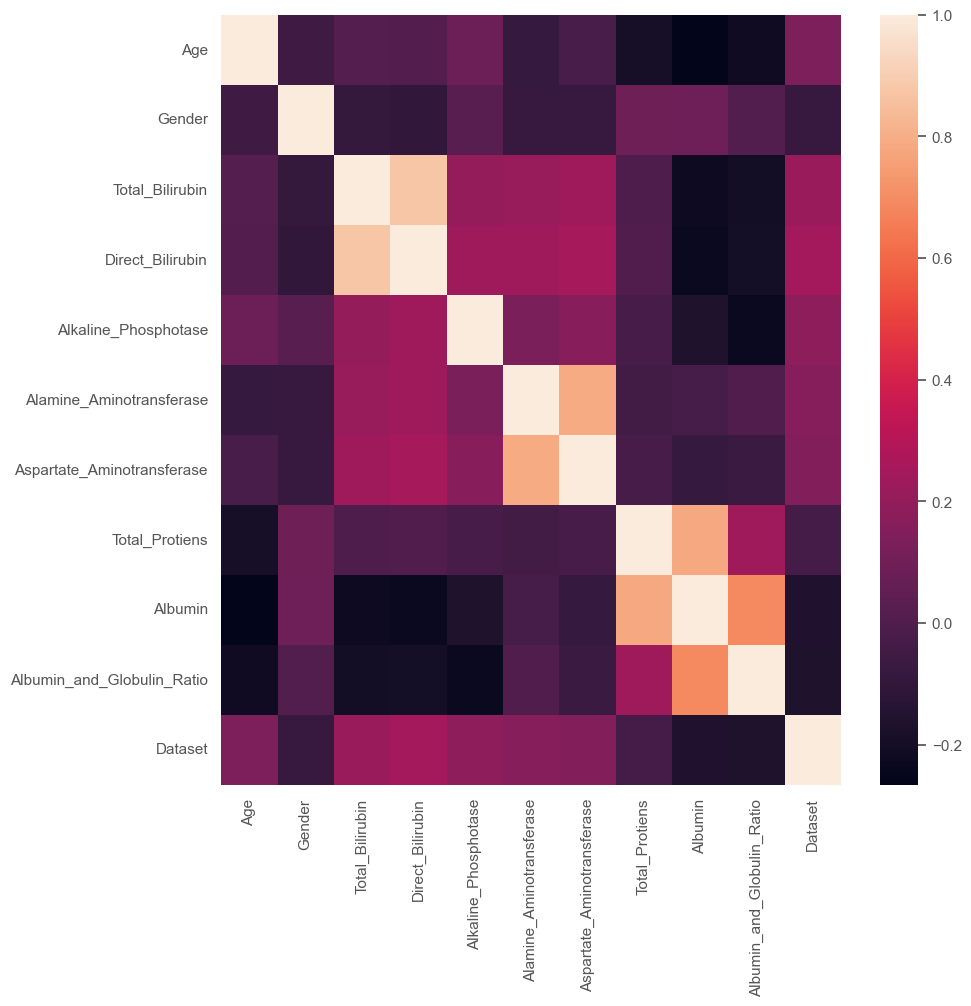

In [90]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr())

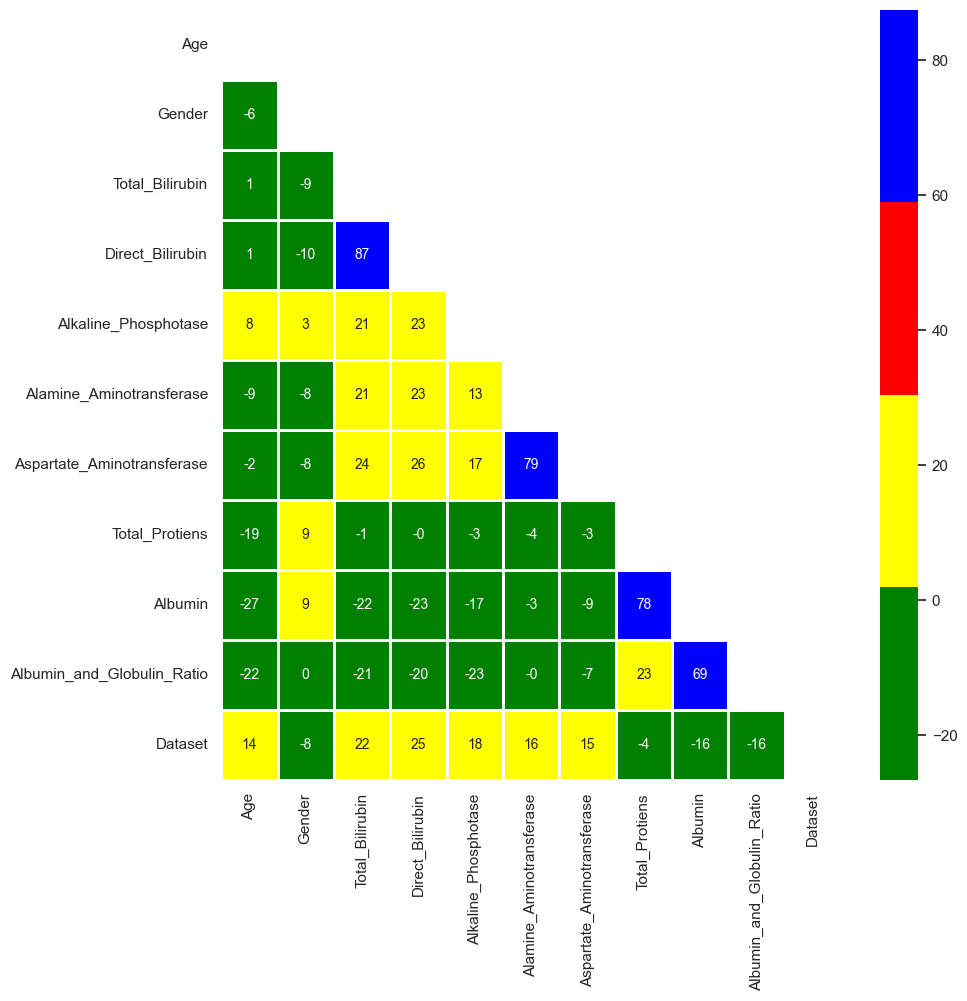

In [91]:
mask = np.zeros_like(df.corr())
mask[np.triu_indices_from(mask)] = True
plt.figure(figsize=(10,10))
with sns.axes_style("white"):
    ax = sns.heatmap(df.corr()*100, mask=mask, fmt = ".0f", annot=True, lw=1, cmap=ListedColormap(['green','yellow','red','blue']))

In [92]:
import warnings
warnings.filterwarnings('ignore')
sns.set()
plt.style.use('ggplot')
%matplotlib inline

In [93]:
#drop duplicates
df = df.drop_duplicates()

In [94]:
df.shape

(570, 11)

In [95]:
# Removing Outlier

<Axes: ylabel='Aspartate_Aminotransferase'>

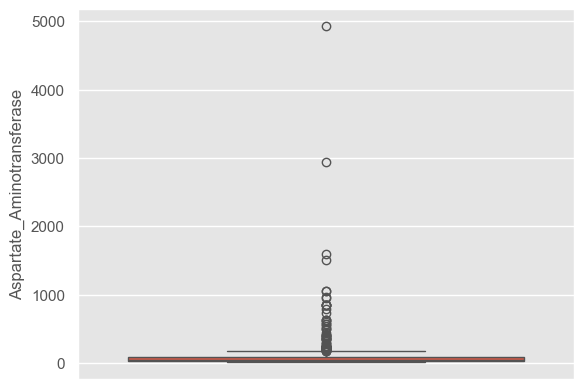

In [96]:
sns.boxplot(df.Aspartate_Aminotransferase)

<Axes: ylabel='Total_Bilirubin'>

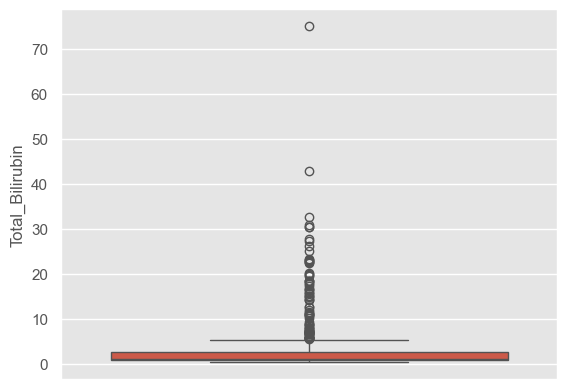

In [97]:
sns.boxplot(df.Total_Bilirubin)

In [98]:
df.Aspartate_Aminotransferase.sort_values(ascending=False).head()

135    4929
117    2946
118    1600
207    1500
199    1050
Name: Aspartate_Aminotransferase, dtype: int64

In [99]:
df = df[df.Aspartate_Aminotransferase<=3000]

In [100]:
df.shape

(569, 11)

In [101]:
df.Aspartate_Aminotransferase.sort_values(ascending=False).head()

117    2946
118    1600
207    1500
119    1050
199    1050
Name: Aspartate_Aminotransferase, dtype: int64

In [102]:
df = df[df.Aspartate_Aminotransferase<=2500]

In [103]:
df.isnull().sum()

Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    4
Dataset                       0
dtype: int64

In [104]:
df = df.dropna(how='any')

In [105]:
df.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,1,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,0,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,0,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,0,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,0,3.9,2.0,195,27,59,7.3,2.4,0.40,1


In [106]:
# split the data into x and y
y=df.Dataset
X=df.drop('Dataset', axis=1)

In [107]:
#performing train test split
X_train, X_test, y_train , y_test = train_test_split(X,y, test_size=0.2, random_state=0, stratify=y)

In [110]:
#feature scaling
scaler=StandardScaler()
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)

In [135]:
# now 1st model Logistic Regression
logistic = LogisticRegression()
logistic.fit(X_train_scaled, y_train)

LogisticRegression()

In [136]:
y_pred = logistic.predict(X_test_scaled)

In [137]:
print(accuracy_score(y_train, logistic.predict(X_train_scaled)))
logistic_acc = accuracy_score(y_test, logistic.predict(X_test_scaled))
print(logistic_acc)
print(confusion_matrix(y_test, logistic.predict(X_test_scaled)))
print(classification_report(y_test, logistic.predict(X_test_scaled)))

0.7117516629711752
0.7699115044247787
[[11 21]
 [ 5 76]]
              precision    recall  f1-score   support

           0       0.69      0.34      0.46        32
           1       0.78      0.94      0.85        81

    accuracy                           0.77       113
   macro avg       0.74      0.64      0.66       113
weighted avg       0.76      0.77      0.74       113



In [116]:
# 2nd model KNeighboursCladdifir
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()
knn.fit(X_train_scaled, y_train)

KNeighborsClassifier()

In [117]:
knn.predict(X_test_scaled)

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0,
       1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 0, 1], dtype=int64)

In [119]:
print(accuracy_score(y_train, lr.predict(X_train_scaled)))
knn_acc = accuracy_score(y_test, knn.predict(X_test_scaled))
print(knn_acc)
print(confusion_matrix(y_test, knn.predict(X_test_scaled)))
print(classification_report(y_test, knn.predict(X_test_scaled)))

0.7117516629711752
0.6637168141592921
[[16 16]
 [22 59]]
              precision    recall  f1-score   support

           0       0.42      0.50      0.46        32
           1       0.79      0.73      0.76        81

    accuracy                           0.66       113
   macro avg       0.60      0.61      0.61       113
weighted avg       0.68      0.66      0.67       113



In [120]:
# our 3rd model Support Vector Machine
svc= SVC(probability=True)
parameters = {
    'gamma':[0.0001, 0.001, 0.01, 0.1],
    'C':[0.01, 0.05, 0.5, 0.1, 1, 10, 15, 20, 30]
}
grid_search = GridSearchCV(svc, parameters)
grid_search.fit(X_train_scaled, y_train)

GridSearchCV(estimator=SVC(probability=True),
             param_grid={'C': [0.01, 0.05, 0.5, 0.1, 1, 10, 15, 20, 30],
                         'gamma': [0.0001, 0.001, 0.01, 0.1]})

In [57]:
grid_search.best_params_

{'C': 0.01, 'gamma': 0.0001}

In [58]:
grid_search.best_score_

0.7117460317460318

In [122]:
svc= SVC(C=0.01, gamma=0.0001,probability=True)
svc.fit(X_train, y_train)

SVC(C=0.01, gamma=0.0001, probability=True)

In [123]:
print(accuracy_score(y_train, svc.predict(X_train_scaled)))
svc_acc = accuracy_score(y_test, svc.predict(X_test_scaled))
print(svc_acc)
print(confusion_matrix(y_test, svc.predict(X_test_scaled)))
print(classification_report(y_test, svc.predict(X_test_scaled)))

0.7117516629711752
0.7168141592920354
[[ 0 32]
 [ 0 81]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        32
           1       0.72      1.00      0.84        81

    accuracy                           0.72       113
   macro avg       0.36      0.50      0.42       113
weighted avg       0.51      0.72      0.60       113



In [124]:
# our 4th model
dtc = DecisionTreeClassifier()
dtc.fit(X_train_scaled, y_train)


DecisionTreeClassifier()

In [125]:
print(accuracy_score(y_train, dtc.predict(X_train_scaled)))
dtc_acc = accuracy_score(y_test, dtc.predict(X_test_scaled))
print(dtc_acc)
print(confusion_matrix(y_test, dtc.predict(X_test_scaled)))
print(classification_report(y_test, dtc.predict(X_test_scaled)))

1.0
0.6194690265486725
[[16 16]
 [27 54]]
              precision    recall  f1-score   support

           0       0.37      0.50      0.43        32
           1       0.77      0.67      0.72        81

    accuracy                           0.62       113
   macro avg       0.57      0.58      0.57       113
weighted avg       0.66      0.62      0.63       113



In [126]:
# Hyper parameter tuning
grid_parameter = {
    'criterion':['gini','entropy'],
    'max_depth':[3,5,7,10,12,15],
    'splitter':['best','random'],
    'min_samples_leaf':[1,2,3,5,7],
    'min_samples_split':[1,2,3,5,7],
    'max_features':['auto','sqrt','log2']
}
grid_seach_dt = GridSearchCV(dtc, grid_parameter, cv=24, n_jobs=-1, verbose=1)
grid_seach_dt.fit(X_train_scaled, y_train)

Fitting 24 folds for each of 1800 candidates, totalling 43200 fits


GridSearchCV(cv=24, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 5, 7, 10, 12, 15],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 3, 5, 7],
                         'min_samples_split': [1, 2, 3, 5, 7],
                         'splitter': ['best', 'random']},
             verbose=1)

In [127]:
grid_seach_dt.best_params_


{'criterion': 'gini',
 'max_depth': 12,
 'max_features': 'sqrt',
 'min_samples_leaf': 5,
 'min_samples_split': 3,
 'splitter': 'random'}

In [128]:
grid_seach_dt.best_score_


0.7336744639376218

In [129]:
# Random Forest

In [130]:
rand_clf = RandomForestClassifier(criterion='entropy', max_depth=15, max_features=0.75, min_samples_leaf=7, min_samples_split=3, n_estimators = 130)

In [131]:
rand_clf.fit(X_train_scaled, y_train)

RandomForestClassifier(criterion='entropy', max_depth=15, max_features=0.75,
                       min_samples_leaf=7, min_samples_split=3,
                       n_estimators=130)

In [132]:
print(accuracy_score(y_train, rand_clf.predict(X_train_scaled)))
rand_clf_acc = accuracy_score(y_test, rand_clf.predict(X_test_scaled))
print(rand_clf_acc)
print(confusion_matrix(y_test, rand_clf.predict(X_test_scaled)))
print(classification_report(y_test, rand_clf.predict(X_test_scaled)))

0.9068736141906873
0.7079646017699115
[[13 19]
 [14 67]]
              precision    recall  f1-score   support

           0       0.48      0.41      0.44        32
           1       0.78      0.83      0.80        81

    accuracy                           0.71       113
   macro avg       0.63      0.62      0.62       113
weighted avg       0.69      0.71      0.70       113



# Model summary
* Logistic regression:- 76%
* KNN :- 66
* svc :- 71
* Random Forest :- 69

In [140]:
# so we move forward with Logistic Regression
import pickle
pickle.dump(scaler,open('liver_scaler.pkl','wb'))
pickle.dump(logistic,open('Liver.pkl','wb'))